In [ ]:
import nltk
import matplotlib.pyplot as plt
import numpy as np

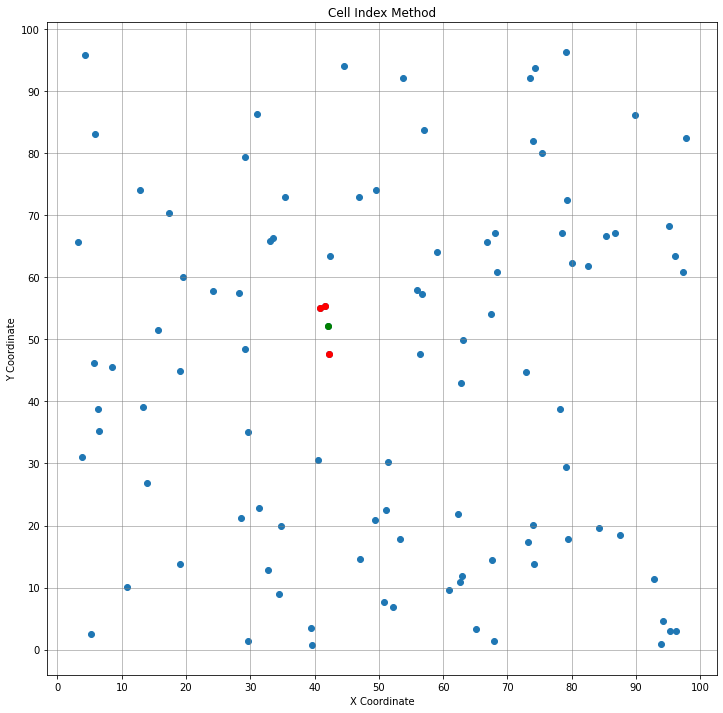

In [ ]:
def column(matrix, i):
    return [row[i] for row in matrix]

static = open('Static100.txt', 'r')
dynamic = open('Dynamic100.txt', 'r')
results = open('AlgunosVecinos_100_rc6.txt','r')

static_content = static.read()
tokens = static_content.split()

particles_r_and_prop = []

i = 0
N = 0;
L = 0;

while i < len(tokens):
  if i == 0:
    N = int(tokens[i])
    i += 1
  if i == 1:
    L = int(tokens[i])
    i += 1
  else:
    particles_r_and_prop.append([tokens[i], tokens[i+1]])
    i += 2

dynamic_content = dynamic.read()
d_tokens = dynamic_content.split()

particles_x_and_y = []

i = 1
while i < len(d_tokens):
  particles_x_and_y.append([float(d_tokens[i]), float(d_tokens[i+1])])
  i += 2

output_content = results.read()
o_tokens = output_content.split('\n')
# Asumo que formato de output es: Encabezado, y después una líena por particula con sus encabezados

neighbours_dict = {}

for line in o_tokens:
  neighbours = line.split(',')
  particle = int(neighbours[0])
  p_neighbours = []
  for i in range(1, len(neighbours)):
    p_neighbours.append(int(neighbours[i]))
  neighbours_dict[particle] = p_neighbours

selected_particle = 91
neighbours = neighbours_dict.get(selected_particle)
to_plot = []

particle = particles_x_and_y[selected_particle - 1]

for neighbour in neighbours:
     to_plot.append(particles_x_and_y[int(neighbour)-1])

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111)
plt.title("Cell Index Method")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
major_ticks = np.arange(0, L + 1, 10) #acá va el valor del M
ax1.set_xticks(major_ticks)
ax1.set_yticks(major_ticks)
ax1.scatter(column(particles_x_and_y, 0), column(particles_x_and_y, 1))
ax1.scatter(particle[0],particle[1], color='green')
ax1.scatter(column(to_plot, 0), column(to_plot, 1), color='red')
plt.grid(color='grey', linewidth=0.5, alpha=1)
